## Семинар 2 "Распознавание рукописных цифр"

ФИО: 

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
%matplotlib inline

In [2]:
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [3]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    pass

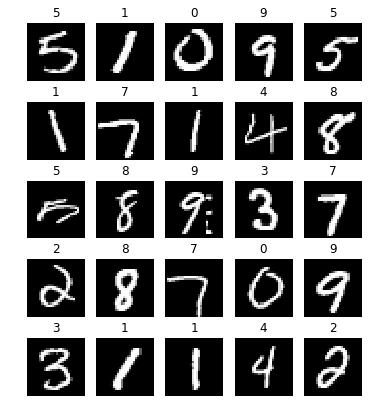

In [4]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [5]:
# good rate - 89%

In [6]:
arc = [Linear(784, 100), Sigmoid(),
       Linear(100, 100), Sigmoid(),
       Linear(100, 10)]
network = NeuralNetwork(arc)
loss = NLLLoss()

In [9]:
for epoch in range(10):
    losses = []
    accuracies = []
    for X, y in train_loader:
        X = X.view(X.shape[0], -1).numpy()
        y = y.numpy()
        prediction = network.forward(X)
        loss_batch = loss.forward(prediction, y)
        losses.append(loss_batch)
        dLdx = loss.backward()
        network.backward(dLdx)
        network.step(0.01)
        accuracies.append((np.argmax(prediction, 1)==y).mean())
    print "NNL", np.mean(losses), "Acc", np.mean(accuracies)
    
    
    losses = []
    accuracies = []
    for X, y in test_loader:
        X = X.view(X.shape[0], -1).numpy()
        y = y.numpy()
        prediction = network.forward(X)
        loss_batch = loss.forward(prediction, y)
        losses.append(loss_batch)
        accuracies.append((np.argmax(prediction, 1)==y).mean())
    print "NNL", np.mean(losses), "Acc", np.mean(accuracies)

NNL 0.27846416760580894 Acc 0.92545
NNL 0.2747813962686737 Acc 0.9258186900958466
NNL 0.26221379064338357 Acc 0.9301333333333334
NNL 0.26149266015058664 Acc 0.9273162939297125
NNL 0.24792520450944472 Acc 0.9329166666666666
NNL 0.24847823178907621 Acc 0.9323083067092651
NNL 0.2349186789191511 Acc 0.9365
NNL 0.2359128842141274 Acc 0.9347044728434505
NNL 0.2236860661221836 Acc 0.9400166666666666
NNL 0.22707518799635357 Acc 0.9379992012779552
NNL 0.21309156915137095 Acc 0.9419166666666666
NNL 0.21703082557331174 Acc 0.9403953674121406
NNL 0.2035672108591904 Acc 0.94495
NNL 0.20796253768032555 Acc 0.9422923322683706
NNL 0.19485486106024033 Acc 0.9467166666666667
NNL 0.20025743188062803 Acc 0.9446884984025559
NNL 0.1867628175082677 Acc 0.9488833333333333
NNL 0.19479711873978417 Acc 0.9458865814696485
NNL 0.17933078450247902 Acc 0.9512333333333334
NNL 0.18775598682396671 Acc 0.9472843450479234


### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

### Часть 3: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?